In [3]:
%load_ext autoreload
%autoreload 2

In [10]:
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import RidgeCV
from dense_nn_class import DLN_Network
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LassoCV
import lightgbm as lgbm
from xgboost import XGBRegressor



estimators = [
    #("gbr", XGBRegressor(**{'max_depth': 10, 'learning_rate': 0.07547737476917998, 'n_estimators': 511, 'min_child_weight': 8, 'gamma': 0.5040721967680127, 'subsample': 0.8037499605646387, 'colsample_bytree': 0.7390517324360482, 'reg_alpha': 0.07237873956441068, 'reg_lambda': 0.3158987021349957, 'random_state': 174})),
    #("lgbm", lgbm.LGBMRegressor(**{'learning_rate': 0.08296453124126314, 'n_estimators': 916, 'random_state': 876, 'loss': 'linear'})),
    ("cat", CatBoostRegressor(**{'objective': 'MAE', 'colsample_bylevel': 0.06793414629614411, 'depth': 14, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'})),
    ("kn", KNeighborsRegressor())
]

reg = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression(),
    cv=10,
    verbose=1,
    passthrough=True,
)

In [11]:
cat_A = CatBoostRegressor()
cat_B = CatBoostRegressor()
cat_C = CatBoostRegressor()

In [12]:
%store -r dm 
dm = dm 

In [13]:
dm.combine_all_data()

['X_test_estimated_a', 'data_A']
['X_test_estimated_b', 'data_B']
['X_test_estimated_c', 'data_C']


In [14]:
from sklearn.model_selection import train_test_split 
import pandas as pd

X = dm.data.iloc[:, 2:]
y = dm.data.iloc[:, 1]


X_A = dm.data_A.iloc[:, 3:]
y_A = dm.data_A.iloc[:, 1]
X_B = dm.data_B.iloc[:, 3:]
y_B = dm.data_B.iloc[:, 1]
X_C = dm.data_C.iloc[:, 3:]
y_C = dm.data_C.iloc[:, 1]

X_A = dm.add_location(X_A, "A")
X_B = dm.add_location(X_B, "B")
X_C = dm.add_location(X_C, "C")

X_train_A = X_A.iloc[0:int(0.7*X_A.shape[0]):]
y_train_A = y_A.iloc[0:int(0.7*y_A.shape[0]):]
X_test_A = X_A.iloc[-int(0.3*X_A.shape[0]):] 
y_test_A = y_A.iloc[-int(0.3*y_A.shape[0]):]

X_test_A, X_validate_A, y_test_A, y_validate_A = train_test_split(X_test_A, y_test_A, train_size=0.4, shuffle=False)

X_train_B = X_B.iloc[0:int(0.7*X_B.shape[0]):]
y_train_B = y_B.iloc[0:int(0.7*y_B.shape[0]):]
X_test_B = X_B.iloc[-int(0.3*X_B.shape[0]):] 
y_test_B = y_B.iloc[-int(0.3*y_B.shape[0]):] 

X_test_B, X_validate_B, y_test_B, y_validate_B = train_test_split(X_test_B, y_test_B, train_size=0.4, shuffle=False)

X_train_C = X_C.iloc[0:int(0.7*X_C.shape[0]):]
y_train_C = y_C.iloc[0:int(0.7*y_C.shape[0]):]
X_test_C = X_C.iloc[-int(0.3*X_C.shape[0]):] 
y_test_C = y_C.iloc[-int(0.3*y_C.shape[0]):] 

X_test_C, X_validate_C, y_test_C, y_validate_C = train_test_split(X_test_C, y_test_C, train_size=0.4, shuffle=False)

X_train = pd.concat([X_train_A, X_train_B, X_train_C], ignore_index=True)
X_validate = pd.concat([X_validate_A, X_validate_B, X_validate_C], ignore_index=True)
X_test = pd.concat([X_test_A, X_test_B, X_test_C], ignore_index=True)

y_train = pd.concat([y_train_A, y_train_B, y_train_C], ignore_index=True)
y_validate = pd.concat([y_validate_A, y_validate_B, y_validate_C], ignore_index=True)
y_test = pd.concat([y_test_A, y_test_B, y_test_C], ignore_index=True)

X_submission = dm.X_test_estimated[dm.X_test_estimated.columns.intersection(X.columns)]

In [15]:

reg.fit(X_train, y_train)

0:	learn: 453.4266912	total: 5.63ms	remaining: 5.63s
1:	learn: 448.2853607	total: 10.7ms	remaining: 5.34s
2:	learn: 443.5214067	total: 14.6ms	remaining: 4.86s
3:	learn: 432.5897222	total: 32.1ms	remaining: 7.98s
4:	learn: 421.2081350	total: 73.2ms	remaining: 14.6s
5:	learn: 410.2235435	total: 92.7ms	remaining: 15.4s
6:	learn: 400.5239434	total: 97.4ms	remaining: 13.8s
7:	learn: 390.1043670	total: 145ms	remaining: 18s
8:	learn: 380.1021446	total: 194ms	remaining: 21.3s
9:	learn: 380.0720316	total: 195ms	remaining: 19.3s
10:	learn: 371.9795277	total: 202ms	remaining: 18.2s
11:	learn: 363.0271657	total: 242ms	remaining: 19.9s
12:	learn: 354.8898410	total: 265ms	remaining: 20.1s
13:	learn: 351.2959018	total: 269ms	remaining: 19s
14:	learn: 343.1538737	total: 278ms	remaining: 18.2s
15:	learn: 335.0220539	total: 323ms	remaining: 19.9s
16:	learn: 328.0437573	total: 326ms	remaining: 18.9s
17:	learn: 320.8574832	total: 345ms	remaining: 18.8s
18:	learn: 313.9070203	total: 390ms	remaining: 20.1s


StackingRegressor(cv=10,
                  estimators=[('cat',
                               <catboost.core.CatBoostRegressor object at 0x29cbcef10>),
                              ('bag', BaggingRegressor()),
                              ('kn', KNeighborsRegressor())],
                  final_estimator=LinearRegression(), passthrough=True,
                  verbose=1)

In [16]:
cat_A.fit(X_train_A, y_train_A)
cat_B.fit(X_train_B, y_train_B)
cat_C.fit(X_train_C, y_train_C)

Learning rate set to 0.063609
0:	learn: 1246.7465123	total: 3.22ms	remaining: 3.22s
1:	learn: 1187.6753037	total: 5.95ms	remaining: 2.97s
2:	learn: 1133.2641832	total: 8.4ms	remaining: 2.79s
3:	learn: 1084.3465062	total: 11ms	remaining: 2.73s
4:	learn: 1038.5016964	total: 13.4ms	remaining: 2.66s
5:	learn: 995.6474571	total: 15.7ms	remaining: 2.6s
6:	learn: 955.7974236	total: 18.1ms	remaining: 2.57s
7:	learn: 919.6196919	total: 20.9ms	remaining: 2.59s
8:	learn: 887.2100769	total: 23.4ms	remaining: 2.58s
9:	learn: 856.4194895	total: 25.8ms	remaining: 2.56s
10:	learn: 827.9845206	total: 28.4ms	remaining: 2.56s
11:	learn: 802.4777006	total: 31.6ms	remaining: 2.6s
12:	learn: 778.5169337	total: 34.3ms	remaining: 2.61s
13:	learn: 756.5263564	total: 37.3ms	remaining: 2.62s
14:	learn: 735.7185069	total: 40ms	remaining: 2.63s
15:	learn: 717.3879232	total: 42.6ms	remaining: 2.62s
16:	learn: 700.4598386	total: 45.6ms	remaining: 2.64s
17:	learn: 685.7340340	total: 48.2ms	remaining: 2.63s
18:	learn:

In [17]:
import numpy as np
import pandas as pd

reg_pred = pd.DataFrame(reg.predict(X_test))

cat_A_pred = pd.DataFrame(cat_A.predict(X_test_A))
cat_B_pred = pd.DataFrame(cat_B.predict(X_test_B))
cat_C_pred = pd.DataFrame(cat_C.predict(X_test_C))

cat_preds = pd.concat([cat_A_pred, cat_B_pred, cat_C_pred], ignore_index=True)


super_pred = pd.DataFrame((0.8 * np.array(cat_preds) + 0.2 * np.array(reg_pred)))

super_pred


,0
0,49.185781
1,3089.363935
2,-19.242959
3,203.488425
4,795.186579
...,...
6865,26.102754
6866,13.299255
6867,338.198745
6868,99.441653


139.74157572982494


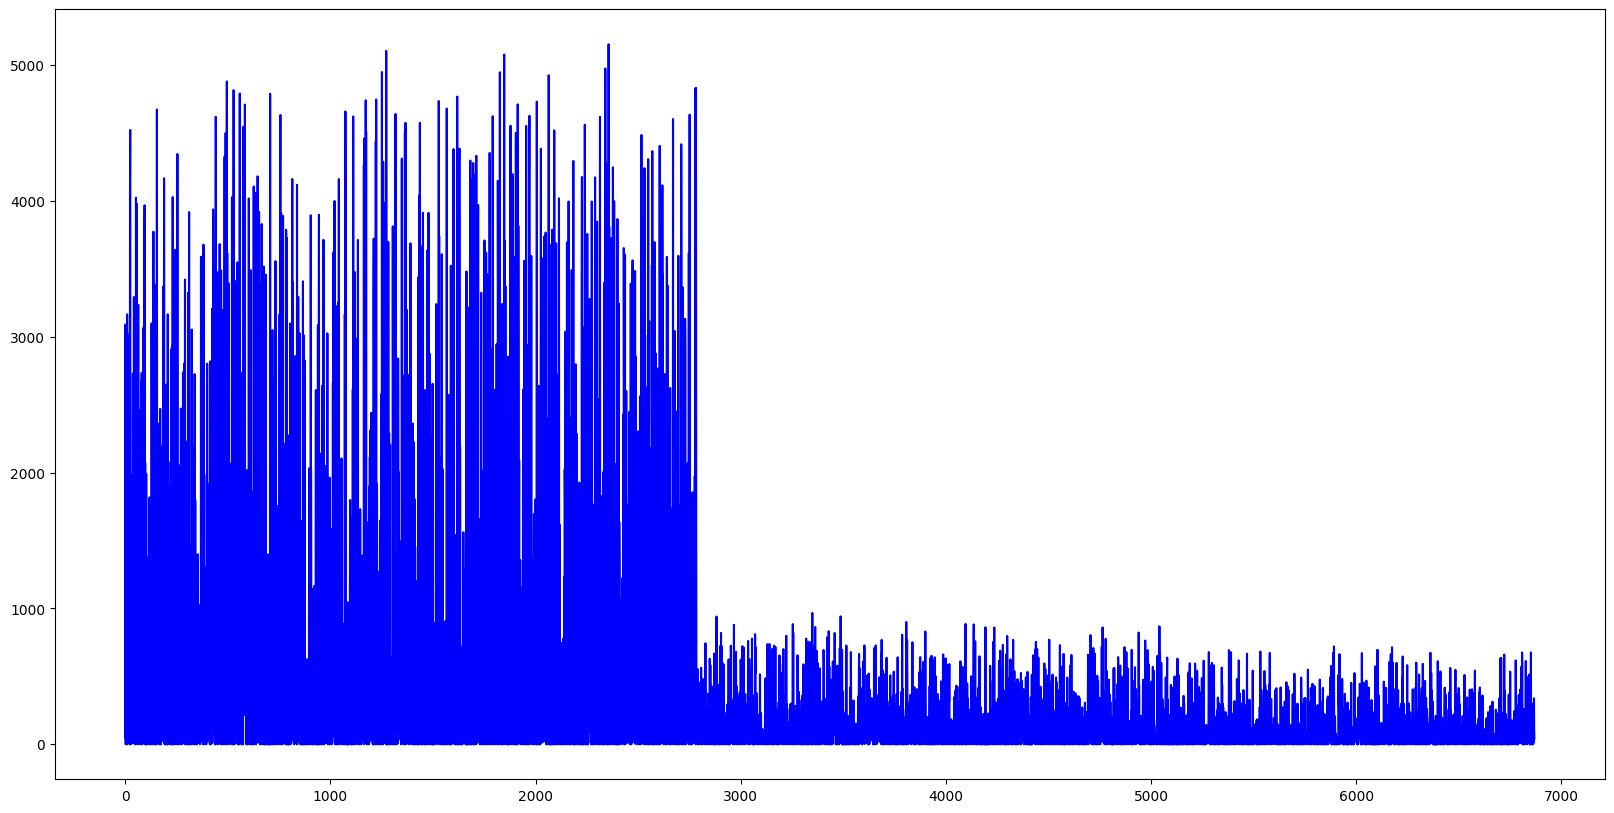

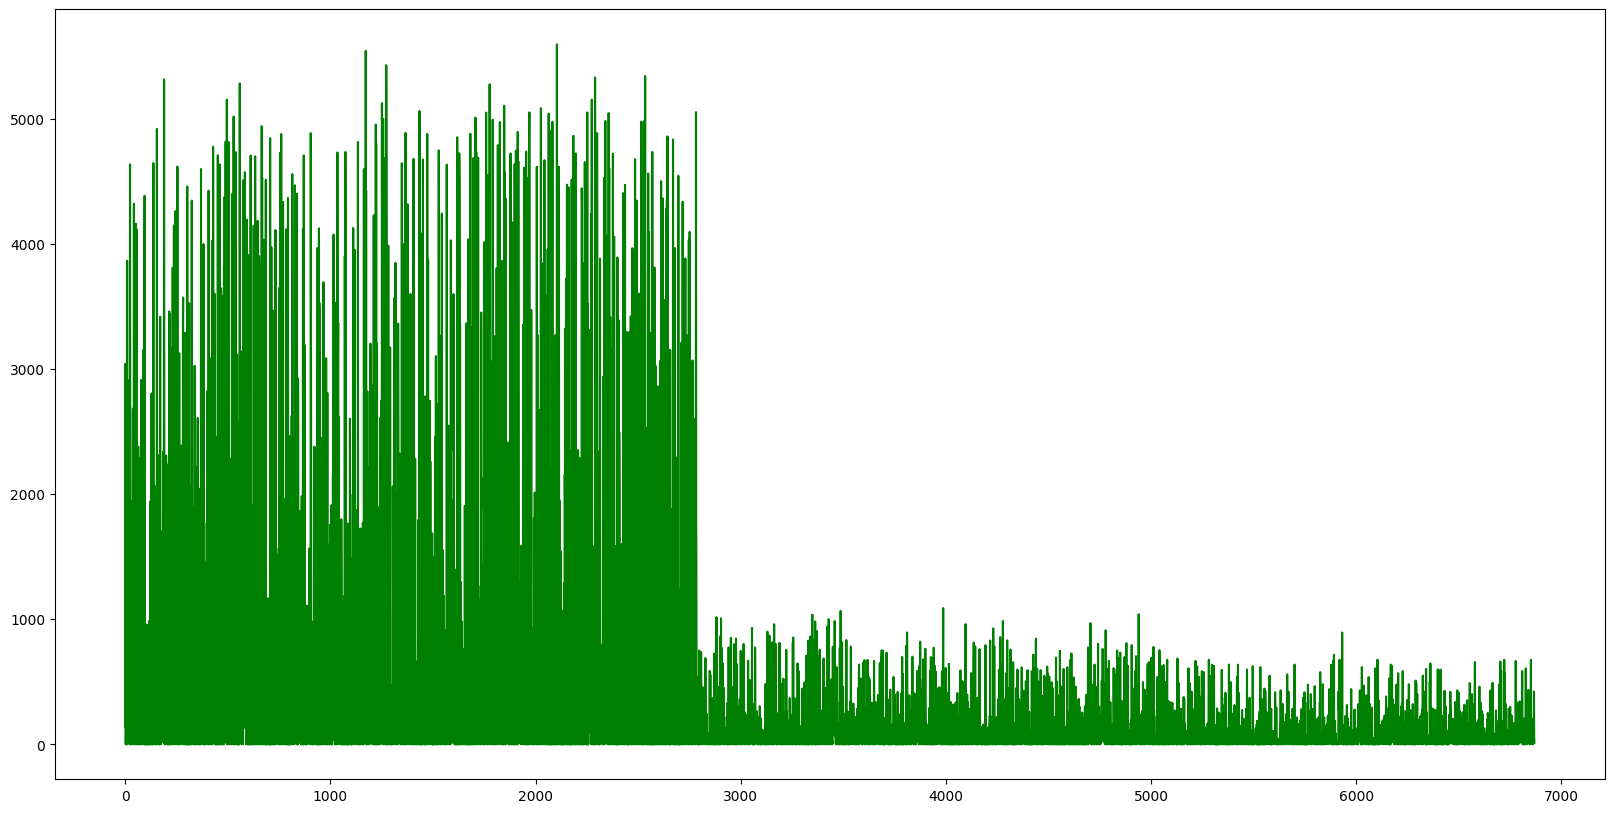

In [21]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

super_pred[super_pred<0] = 0

print(mean_absolute_error(super_pred, y_test))

fig, axs = plt.subplots(1, 1, figsize=(20, 10))
plt.plot(super_pred, c="b", label="super pred")
fig, axs = plt.subplots(1, 1, figsize=(20, 10))
plt.plot(y_test, c="g", label="true")
plt.show()



In [26]:
## Specify the model to be used
import numpy as np
import pandas as pd

pred = reg.predict(X_submission)

pred = pd.DataFrame(pred.reshape((3*720,)))


pred[pred<0] = 0

# NAME THE FILE 
pred.to_csv("stack_5.csv")

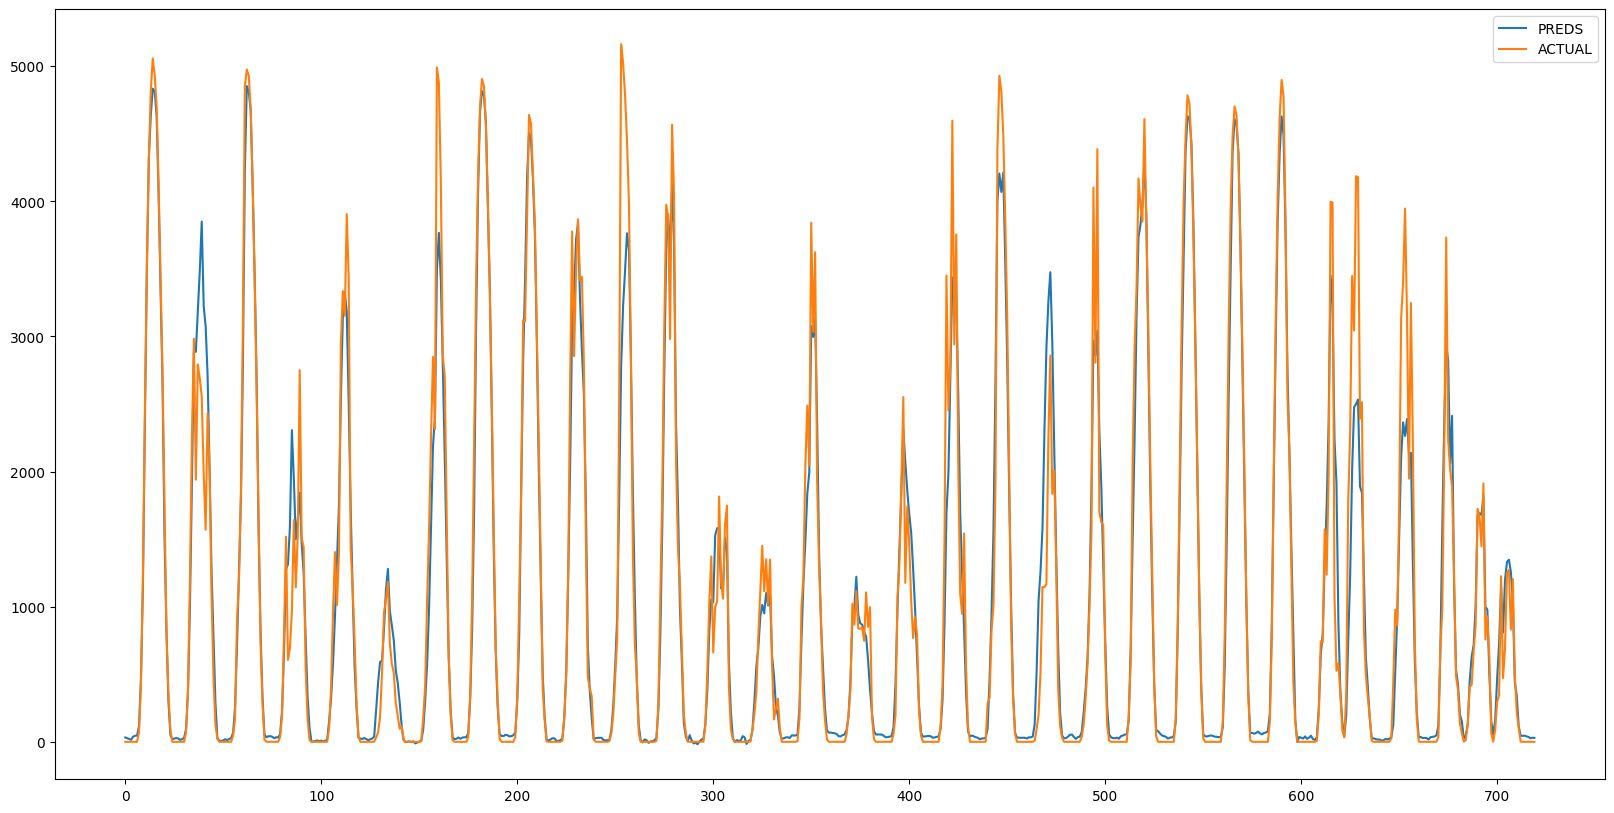

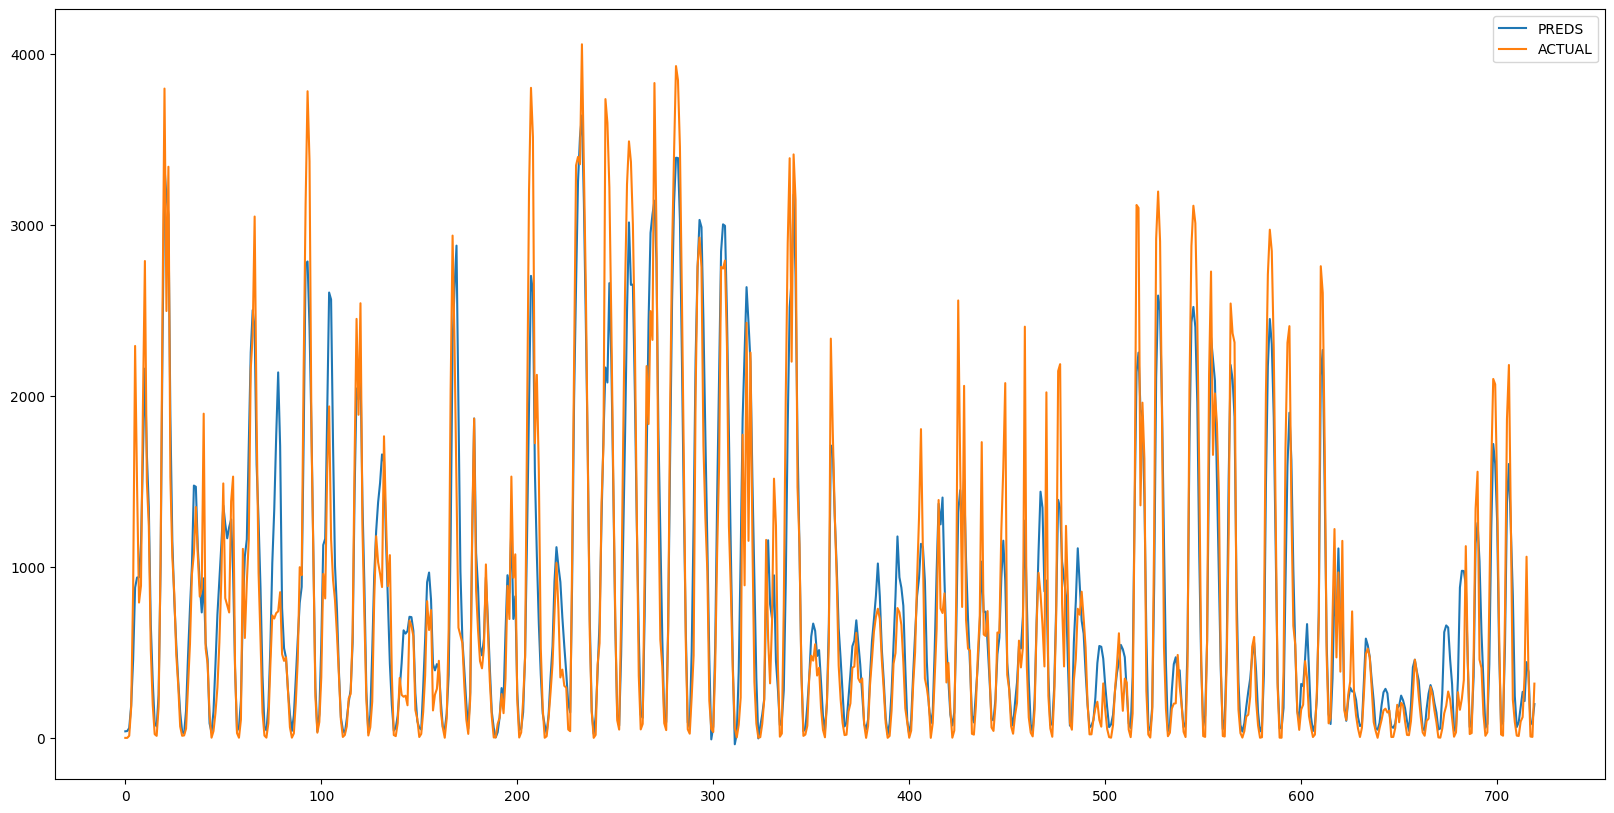

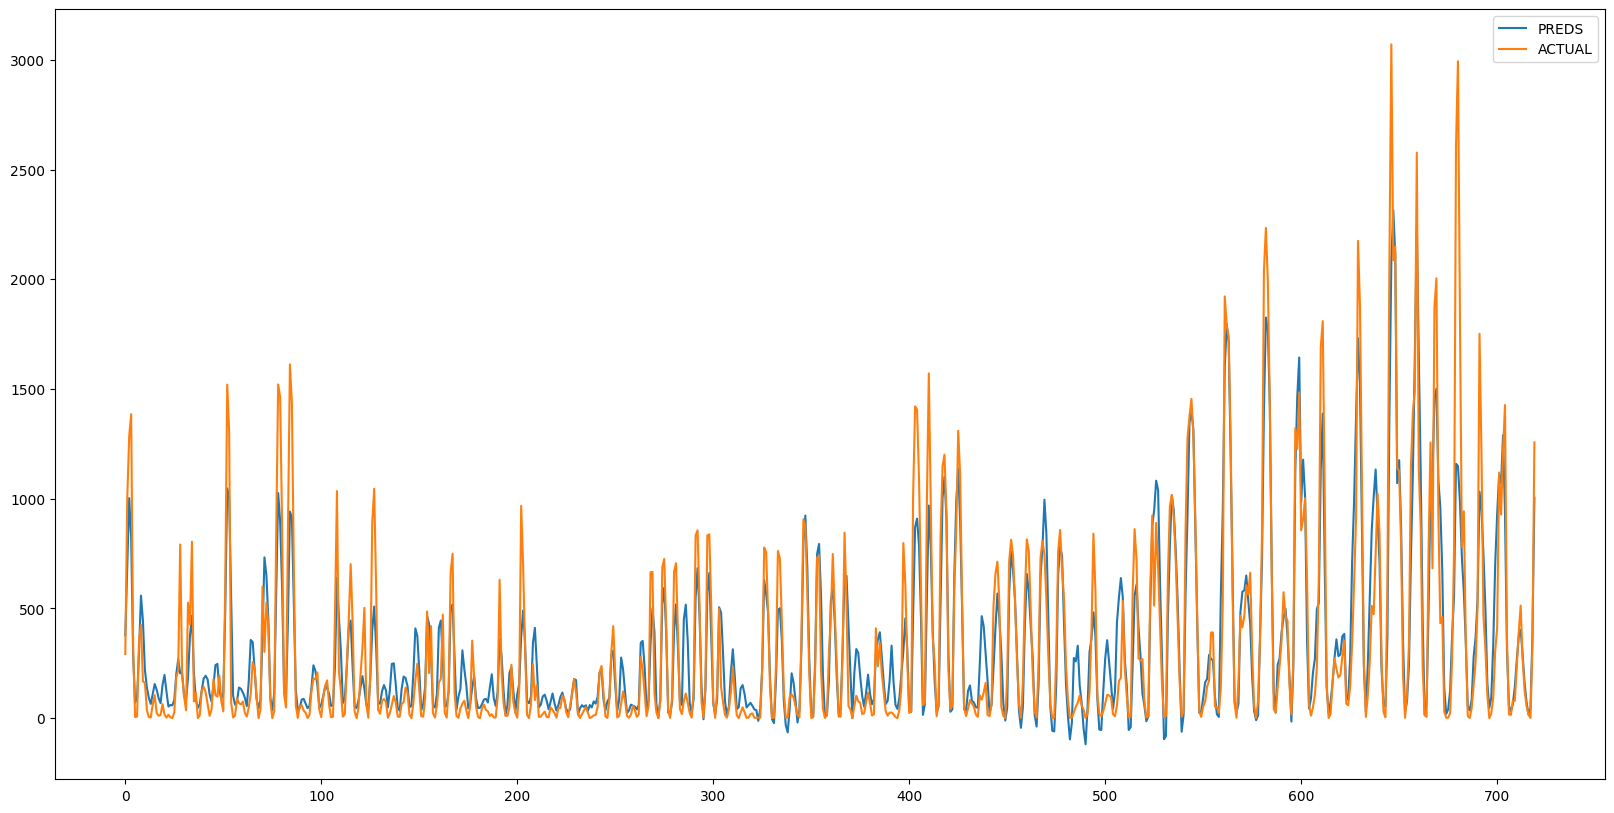

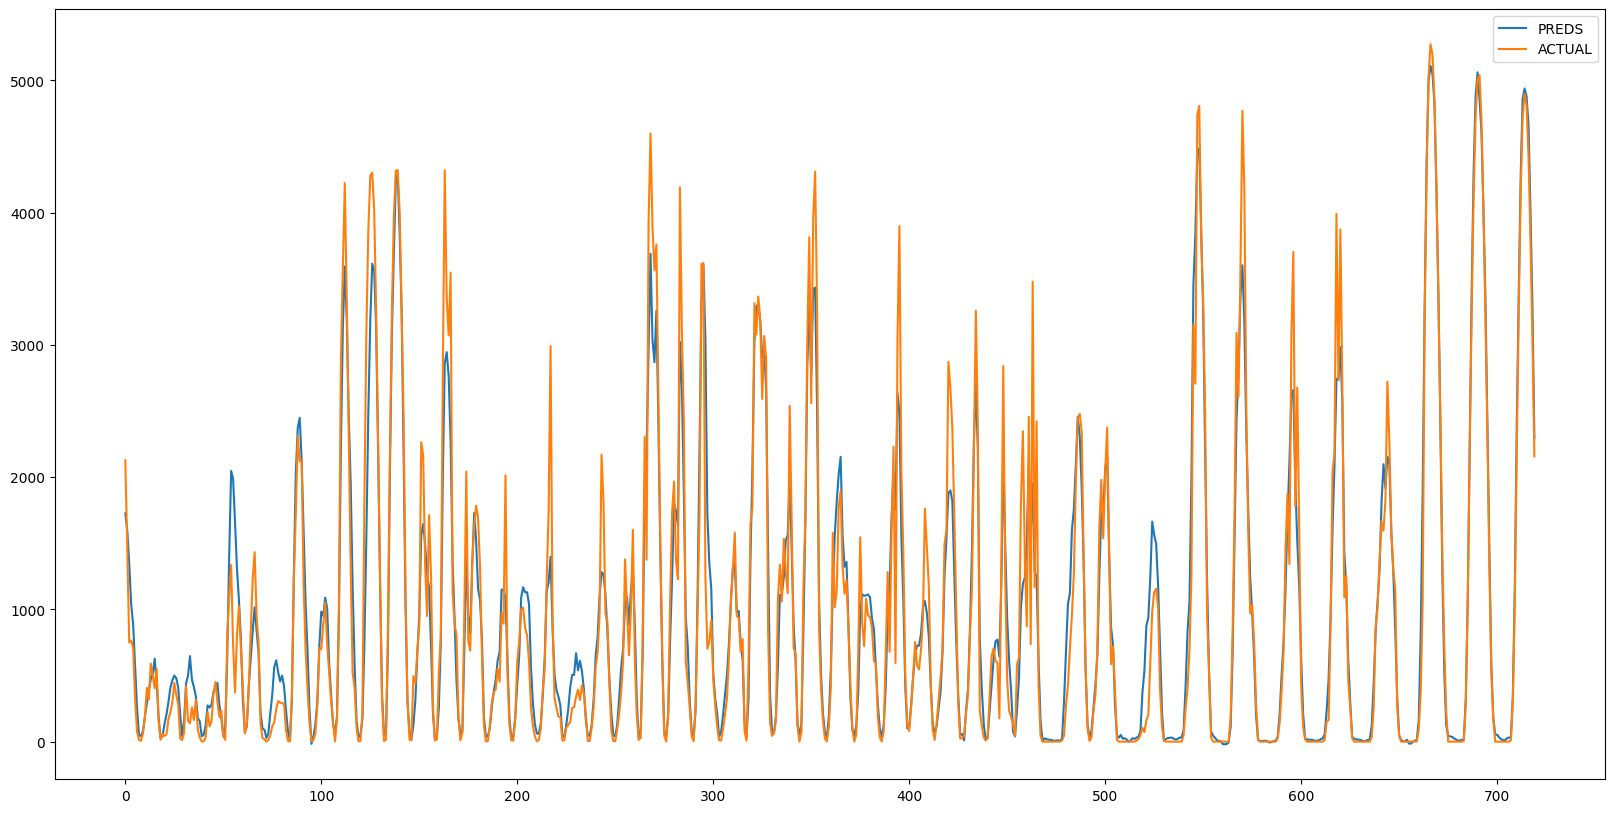

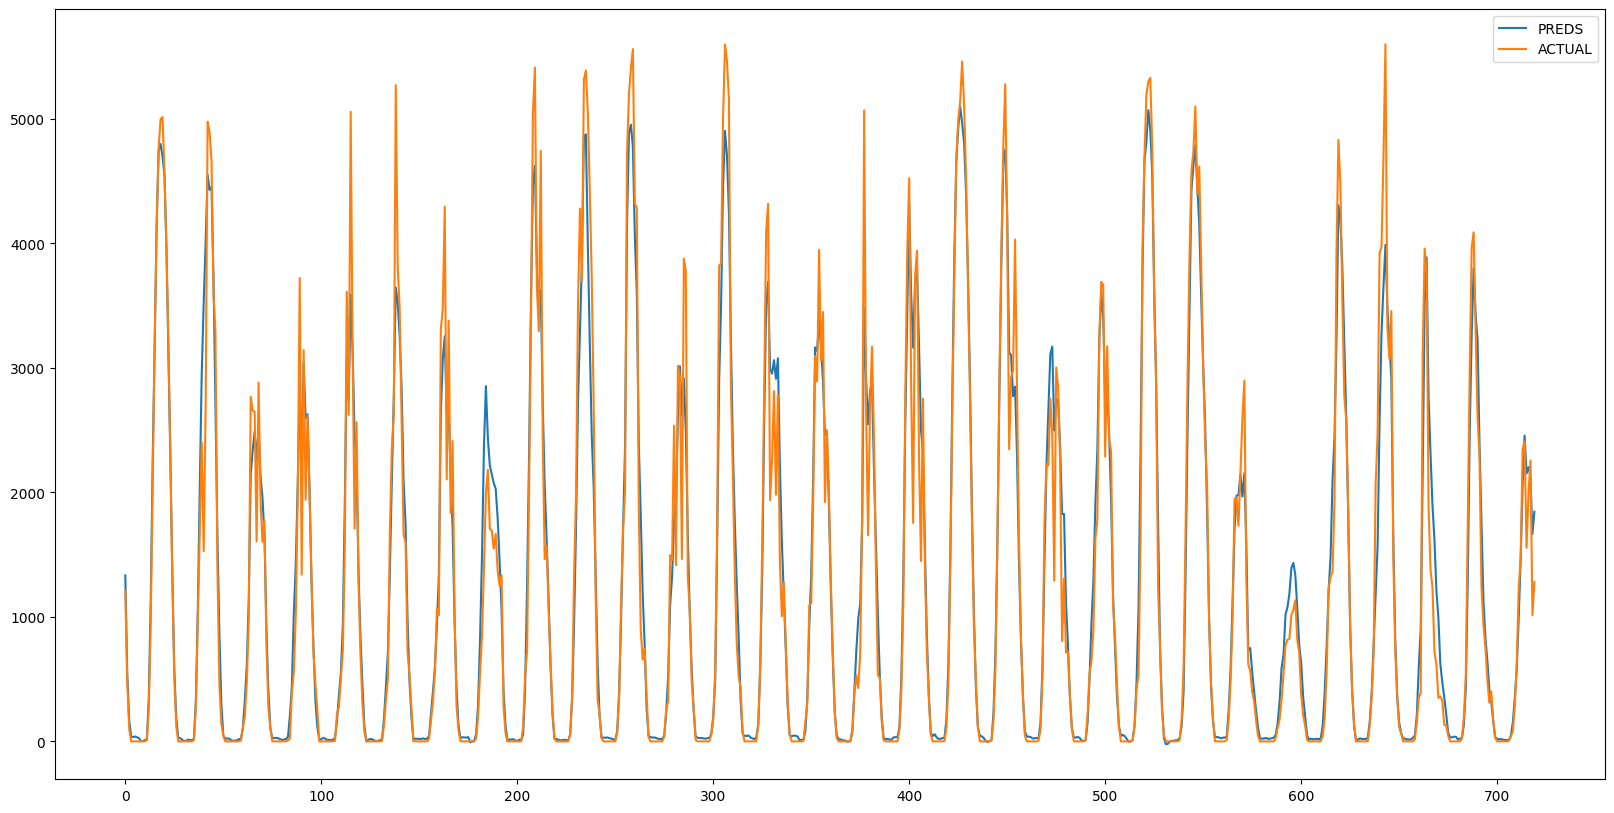

In [30]:
import matplotlib.pyplot as plt

x = np.arange(0, 720, 1)

for i in range(10, 15): 

    y_mid_preds = reg.predict(X.iloc[i*720:(i+1)*720])

    y_mid_actual = y.iloc[i*720:(i+1)*720]

    fig, axs = plt.subplots(1, 1, figsize=(20, 10))
    plt.plot(x, y_mid_preds, label="PREDS")
    plt.plot(x, y_mid_actual, label="ACTUAL")
    plt.legend()
    plt.show()




In [44]:
goodpred = pd.read_csv("log_sub_4.csv") # 154.98
bestpred = pd.read_csv("catboost_1.csv") # 152.69
from sklearn.metrics import mean_absolute_error

def compare_new(newpred):
    good_best = mean_absolute_error(goodpred['prediction'], bestpred['prediction'])
    print('mae between good and best: ', good_best)
    good_new = mean_absolute_error(goodpred['prediction'], newpred['prediction'])
    print('mae between good and new: ', good_new)
    best_new = mean_absolute_error(bestpred['prediction'], newpred['prediction'])
    print('mae between best and new: ', best_new)

    new_better = best_new < good_new and good_new > good_best

    return new_better

newpred = pd.read_csv("catboost_4.csv")
print('new is better:',compare_new(newpred))

mae between good and best:  58.72995223783157
mae between good and new:  66.07532421459617
mae between best and new:  56.44328267046195
new is better: True


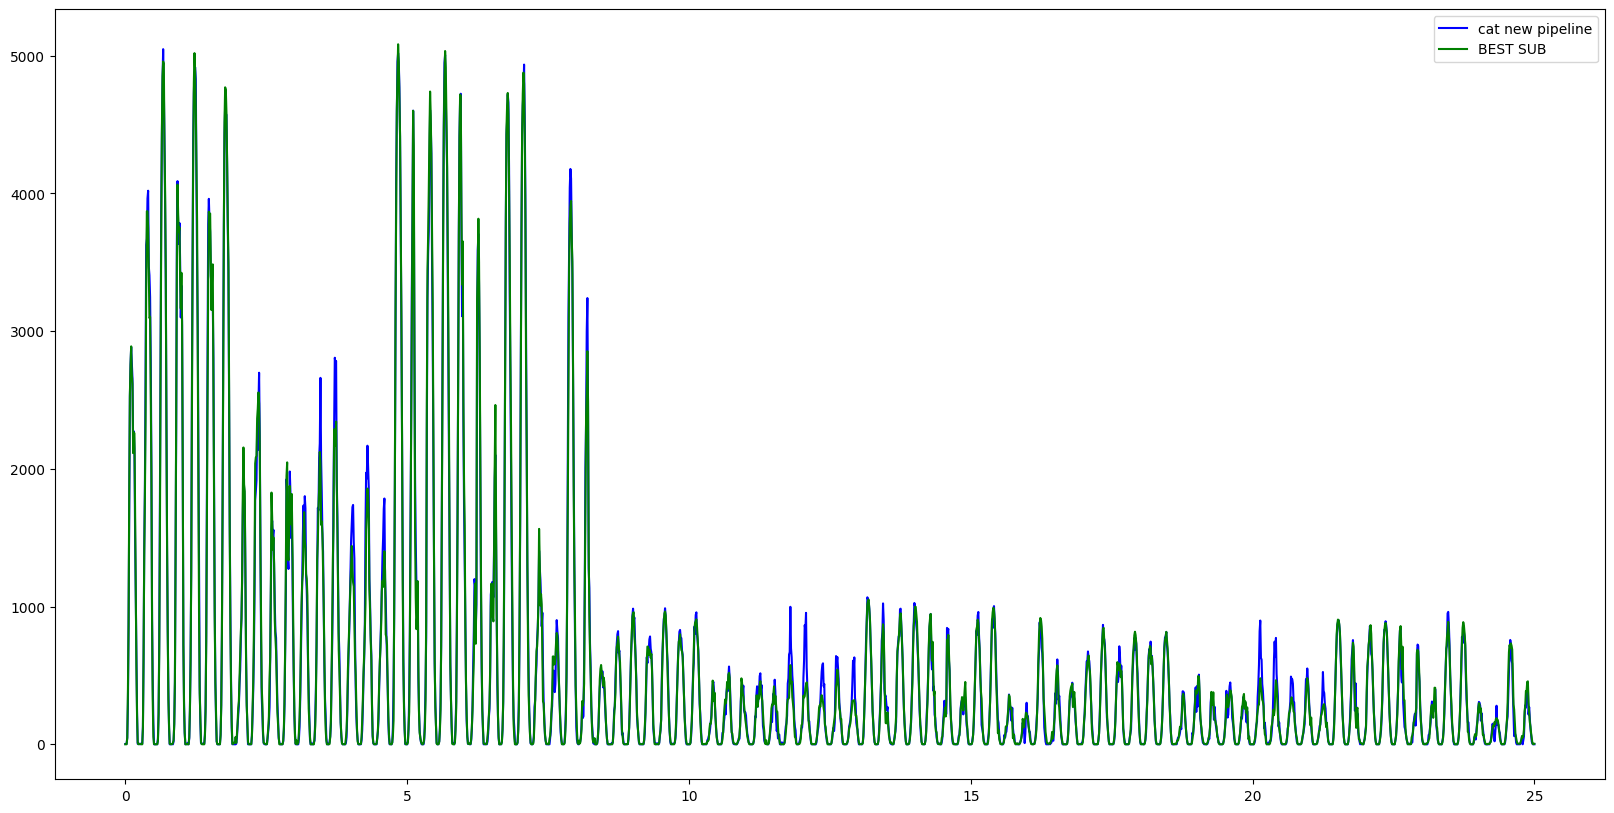

44.32661643424465
45.923729362880486
30.7439953136374
best vs stack5:  26.118441907586107
best vs log4:  29.364976118915784
stack5 vs log4:  25.97821702416659
------------------------------------------------------------------------------------
cat2 vs best:  28.143453298499814
cat2 vs stack5:  35.356957855269634
cat2 vs log4:  38.065270839295955
------------------------------------------------------------------------------------
cat3 vs best:  41.47133855748234
cat3 vs stack5:  43.62317671142585
cat3 vs log4:  44.39563971266245
------------------------------------------------------------------------------------
cat4 vs best:  28.221641335230974
cat4 vs stack5:  29.600843589202704
cat4 vs log4:  33.03766210729808
------------------------------------------------------------------------------------
cat10 vs best:  26.983914809246965
cat10 vs stack5:  31.957089699052105
cat10 vs log4:  32.4875361609463
------------------------------------------------------------------------------------
cat

In [3]:
import matplotlib.pyplot as plt 
import csv 
import numpy as np 
import pandas as pd
from sklearn.metrics import mean_absolute_error
stack1_pred = pd.read_csv("stack_1.csv")
stack2_pred = pd.read_csv("stack_2.csv")
stack3_pred = pd.read_csv("stack_3.csv")
stack5_pred = pd.read_csv("stack_5.csv")
cat2_pred = pd.read_csv("catboost_2.csv")
cat3_pred = pd.read_csv("catboost_3.csv")
cat4_pred = pd.read_csv("catboost_4.csv")
cat10_pred = pd.read_csv("catboost_10.csv")
cat11_pred = pd.read_csv("catboost_11.csv")
cat12_pred = pd.read_csv("catboost_12.csv")
cat13_pred = pd.read_csv("catboost_13_single.csv")
cat15_pred = pd.read_csv("catboost_15_single.csv")
cat20_pred = pd.read_csv("catboost_20_A_BC.csv")
cat22_pred = pd.read_csv("catboost_22_single.csv")
cat30_pred = pd.read_csv("catboost_30_single.csv")
cat_1_sep = pd.read_csv("catboost_1_seperate.csv")
log4_pred = pd.read_csv("log_sub_4.csv")
best_pred = pd.read_csv("catboost_1.csv")

diff = pd.DataFrame(stack2_pred) - pd.DataFrame(best_pred)

x = np.linspace(0, 25, 3*720)
y = [] 
  
with open('catboost_30_single.csv','r') as csvfile: 
    plots = csv.reader(csvfile, delimiter = ',') 

    plots.__next__()
    i = 1
      
    for row in plots: 
        y.append(float(row[1])) 
        # i += 1

        # if ( i == 721): 
        #     break
            
        
# plt.legend()


y2 = []

with open('catboost_1.csv','r') as csvfile: 
    plots = csv.reader(csvfile, delimiter = ',') 

    plots.__next__()
    i = 1
      
    for row in plots: 
        y2.append(float(row[1])) 
        # i += 1

        # if ( i == 721): 
        #     break
            
        
fig, axs = plt.subplots(1, 1, figsize=(20, 10))
plt.plot(x, y, color = 'b', label="cat new pipeline") 

plt.plot(x, y2, color = 'g', label="BEST SUB") 

plt.legend() 
plt.show()


print(mean_absolute_error(best_pred, stack1_pred))
print(mean_absolute_error(best_pred, stack2_pred))
print(mean_absolute_error(best_pred, stack3_pred))
print("best vs stack5: ",mean_absolute_error(best_pred, stack5_pred))
print("best vs log4: ", mean_absolute_error(best_pred, log4_pred))
print("stack5 vs log4: ", mean_absolute_error(stack5_pred, log4_pred))
print("------------------------------------------------------------------------------------")
print("cat2 vs best: ", mean_absolute_error(best_pred, cat2_pred))
print("cat2 vs stack5: ", mean_absolute_error(stack5_pred, cat2_pred))
print("cat2 vs log4: ", mean_absolute_error(log4_pred, cat2_pred))
print("------------------------------------------------------------------------------------")
print("cat3 vs best: ", mean_absolute_error(best_pred, cat3_pred))
print("cat3 vs stack5: ", mean_absolute_error(stack5_pred, cat3_pred))
print("cat3 vs log4: ", mean_absolute_error(log4_pred, cat3_pred))
print("------------------------------------------------------------------------------------")
print("cat4 vs best: ", mean_absolute_error(best_pred, cat4_pred))
print("cat4 vs stack5: ", mean_absolute_error(stack5_pred, cat4_pred))
print("cat4 vs log4: ", mean_absolute_error(log4_pred, cat4_pred))
print("------------------------------------------------------------------------------------")
print("cat10 vs best: ", mean_absolute_error(best_pred, cat10_pred))
print("cat10 vs stack5: ", mean_absolute_error(stack5_pred, cat10_pred))
print("cat10 vs log4: ", mean_absolute_error(log4_pred, cat10_pred))
print("------------------------------------------------------------------------------------")
print("cat11 vs best: ", mean_absolute_error(best_pred, cat11_pred))
print("cat11 vs stack5: ", mean_absolute_error(stack5_pred, cat11_pred))
print("cat11 vs log4: ", mean_absolute_error(log4_pred, cat11_pred))
print("------------------------------------------------------------------------------------")
print("cat12 vs best: ", mean_absolute_error(best_pred, cat12_pred))
print("cat12 vs stack5: ", mean_absolute_error(stack5_pred, cat12_pred))
print("cat12 vs log4: ", mean_absolute_error(log4_pred, cat12_pred))
print("------------------------------------------------------------------------------------")
print("cat13 vs best: ", mean_absolute_error(best_pred, cat13_pred))
print("cat13 vs stack5: ", mean_absolute_error(stack5_pred, cat13_pred))
print("cat13 vs log4: ", mean_absolute_error(log4_pred, cat13_pred))
print("cat13 vs cat12: ", mean_absolute_error(cat12_pred, cat13_pred))
print("------------------------------------------------------------------------------------")
print("cat20 vs best: ", mean_absolute_error(best_pred, cat20_pred))
print("cat20 vs stack5: ", mean_absolute_error(stack5_pred, cat20_pred))
print("cat20 vs log4: ", mean_absolute_error(log4_pred, cat20_pred))
print("cat20 vs cat12: ", mean_absolute_error(cat12_pred, cat20_pred))
print("cat20 vs cat13: ", mean_absolute_error(cat13_pred, cat20_pred))
print("------------------------------------------------------------------------------------")
print("cat15 vs best: ", mean_absolute_error(best_pred, cat15_pred))
print("cat15 vs stack5: ", mean_absolute_error(stack5_pred, cat15_pred))
print("cat15 vs log4: ", mean_absolute_error(log4_pred, cat15_pred))
print("cat15 vs cat12: ", mean_absolute_error(cat12_pred, cat15_pred))
print("cat15 vs cat13: ", mean_absolute_error(cat13_pred, cat15_pred))
print("------------------------------------------------------------------------------------")
print("cat_sep_1 vs best: ", mean_absolute_error(best_pred, cat_1_sep))
print("cat_sep_1 vs stack5: ", mean_absolute_error(stack5_pred, cat_1_sep))
print("cat_sep_1 vs log4: ", mean_absolute_error(log4_pred, cat_1_sep))
print("cat_sep_1 vs cat12: ", mean_absolute_error(cat12_pred, cat_1_sep))
print("cat_sep_1 vs cat13: ", mean_absolute_error(cat13_pred, cat_1_sep))
print("------------------------------------------------------------------------------------")
print("cat22 vs best: ", mean_absolute_error(best_pred, cat22_pred))
print("cat22 vs stack5: ", mean_absolute_error(stack5_pred, cat22_pred))
print("cat22 vs log4: ", mean_absolute_error(log4_pred, cat22_pred))
print("cat22 vs cat12: ", mean_absolute_error(cat12_pred, cat22_pred))
print("cat22 vs cat13: ", mean_absolute_error(cat13_pred, cat22_pred))
print("------------------------------------------------------------------------------------")
print("cat30 vs best: ", mean_absolute_error(best_pred, cat30_pred))
print("cat30 vs stack5: ", mean_absolute_error(stack5_pred, cat30_pred))
print("cat30 vs log4: ", mean_absolute_error(log4_pred, cat30_pred))
print("cat30 vs cat12: ", mean_absolute_error(cat12_pred, cat30_pred))
print("cat30 vs cat13: ", mean_absolute_error(cat13_pred, cat30_pred))
